In [1]:
import pandas as pd
import torch   

#handling text data
from torchtext.legacy import data  


In [2]:
from google.colab import drive;
drive.mount("/content/drive");

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/00SoftLab/ass3/Dataset 3.csv',encoding='ISO-8859-1')
data

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
print(len(data))
data.head()

10314


,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
import re
def remove(text):
    return re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)

In [6]:
data['tweets'] = data['tweets'].apply(lambda x: remove(x))
data.drop(10313,inplace=True)
data

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat Need to send 'em to my accountant tomor...,0
4,ADD ME ON MYSPACE myspacecomLookThunder,0
...,...,...
10308,Many sufferers of depression aren't sad they f...,1
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [7]:
import re
import tensorflow as tf

max_features = 4000

In [8]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['tweets'].values)

In [9]:
X = tokenizer.texts_to_sequences(data['tweets'].values)

In [10]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [11]:
X.shape

(10313, 67)

In [12]:
embed_dim = 256
lstm_out = 196

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 67, 256)           1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 67, 256)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 67, 392)           710304    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 392)               923552    
_________________________________________________________________
dense (Dense)                (None, 2)                 786       
Total params: 2,658,642
Trainable params: 2,658,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
Y = pd.get_dummies(data['sentiment'])

In [16]:
result_dict = {0: 'Negative', 1: 'Positive'}
y_arr = np.vectorize(result_dict.get)(Y.columns)

In [17]:
Y = Y.values

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [19]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6909, 67) (6909, 2)
(3404, 67) (3404, 2)


In [20]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
54/54 - 260s - loss: 0.3050 - accuracy: 0.8657
Epoch 2/20
54/54 - 250s - loss: 0.0292 - accuracy: 0.9926
Epoch 3/20
54/54 - 250s - loss: 0.0178 - accuracy: 0.9957
Epoch 4/20
54/54 - 249s - loss: 0.0117 - accuracy: 0.9970
Epoch 5/20
54/54 - 249s - loss: 0.0071 - accuracy: 0.9981
Epoch 6/20
54/54 - 248s - loss: 0.0067 - accuracy: 0.9981
Epoch 7/20
54/54 - 249s - loss: 0.0075 - accuracy: 0.9981
Epoch 8/20
54/54 - 248s - loss: 0.0022 - accuracy: 0.9994
Epoch 9/20
54/54 - 249s - loss: 7.3616e-04 - accuracy: 0.9997
Epoch 10/20
54/54 - 248s - loss: 0.0023 - accuracy: 0.9993
Epoch 11/20
54/54 - 247s - loss: 0.0013 - accuracy: 0.9994
Epoch 12/20
54/54 - 248s - loss: 5.4858e-04 - accuracy: 0.9999
Epoch 13/20
54/54 - 250s - loss: 0.0012 - accuracy: 0.9996
Epoch 14/20
54/54 - 249s - loss: 0.0042 - accuracy: 0.9993
Epoch 15/20
54/54 - 248s - loss: 0.0021 - accuracy: 0.9996
Epoch 16/20
54/54 - 248s - loss: 0.0022 - accuracy: 0.9993
Epoch 17/20
54/54 - 248s - loss: 3.0440e-04 - accuracy: 1

In [21]:
y_pred=np.round(model.predict(X_test))

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

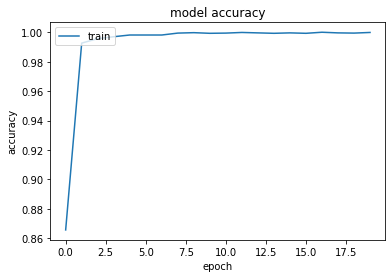

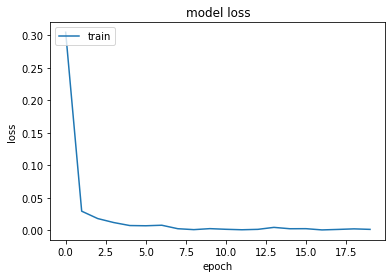

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9864864864864865

In [28]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='micro')

0.9864864864864865

In [29]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_pred, average='micro')

0.9864864864864865

In [30]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred, average='micro')

0.9864864864864865

In [56]:
#Y_test.flatten()

In [57]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from pandas import Series
#import numpy as np
#y_pred=model.predict(X_test) 
#y_pred = (y_pred > 0.5)

#conf=confusion_matrix(Y_test,y_pred)

#print(conf)

#import seaborn as sn

#sn.heatmap(conf, cmap="Blues", annot=True)# font size
#conf
